In [1]:
import numpy as np

In [32]:
def perceptron_version_batch(P, N, X, TAU, alpha):
    Weight = np.random.uniform(-1,1,(N+1,1))
    print('le poid d initialisrion est :','\n', Weight)
    DeltaWeight = np.zeros((N+1,1))
    X = np.append(np.ones((P,1)),X,axis=1)  
    IT=0
    while True:
        
        IT+=1
        Y = np.sign(np.dot(X,Weight))
        if np.array_equal(Y,TAU) is True:
            break
        else:
            DeltaWeight = alpha*(np.dot(X.T,(TAU - Y)))
            Weight = Weight + DeltaWeight
        #print('le poid est' , Weight)
        print('l iteration est :',IT)
    return Weight,IT

In [33]:
def perceptron_version_online(P, N, X, tau, alpha):
    # Initialisation des poids W
    W = np.random.uniform(-1,1,(N+1,1))
    Dw = np.zeros((N+1,1))
    ones = np.ones((P,1))
    X_new = np.append(ones,X,axis=1)
    stop = False
    IT = 0
    while not stop:
        for k in range(P):
            IT += 1
            y = np.sign(np.dot(X_new[k],W))
            if y != tau[k]:
                # Mise à jour des poids
                Dw = alpha*(tau[k] - y)*X_new[k].reshape((N+1,1))
                W = W + Dw
            # Vérifiation si tout les données ont été bien classifié
            if np.array_equal(np.sign(X_new@W),tau):
                stop = True
                break
            
    return W, IT

In [34]:
P = 4 # nombre de points
N = 2 # entree binaire
alpha = 1

# Initialisation des données d'entrainement
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
TAU_ET = np.array([[-1],[-1],[-1],[1]])
TAU_OU = np.array([[-1],[1],[1],[1]])
#expemple fait en coure : Fichier Perceptron Page 42
P_Ex = 6
X_Ex = np.array([[5,-1],[2,6],[3, 3],[2, 1],[-1,1],[1,-2]])
TAU_Ex = np.array([[1],[1],[1],[-1],[-1],[-1]])

In [35]:
Weight_ET, IT_ET = perceptron_version_batch(P, N, X, TAU_ET, alpha)
Weight_OU, IT_OU = perceptron_version_batch(P, N, X, TAU_OU, alpha)
Weight_Ex, IT_Ex = perceptron_version_batch(P_Ex, N, X_Ex, TAU_Ex, alpha)
print('Weight_ET :', Weight_ET, '\n','IT_ET :',IT_ET,'\n')


l iteration est : 1
l iteration est : 2
l iteration est : 1
l iteration est : 2
l iteration est : 1
l iteration est : 2
l iteration est : 3
l iteration est : 4
l iteration est : 5
l iteration est : 6
l iteration est : 7
l iteration est : 8
Weight_ET : [[-3.03480677]
 [ 4.55958675]
 [ 3.89620398]] 
 IT_ET : 3 



In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_decision(X, TAU, Weight, title):
    unique = np.unique(TAU)
    for k in unique:
        X_new = X[TAU.squeeze()==k]
        plt.scatter(X_new[:,0],X_new[:,1])
    #la resolution de l'equation mX+c = wX nous permet de trouver m et c
    x1 =[min(X[:,0]),max(X[:,0])] 
    m = -(Weight[0]/Weight[2])/(Weight[0]/Weight[1]) 
    c = -Weight[0]/Weight[2]
    x2= x1*m+c
    plt.plot(x1,x2,'y-')
    plt.title(title)
    plt.show()

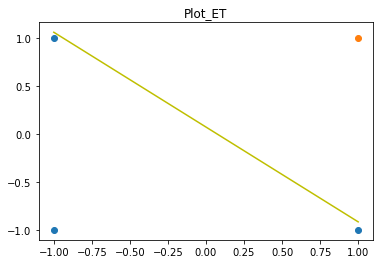

None


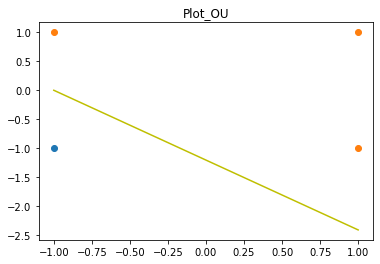

None


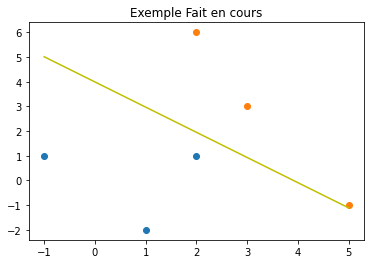

None


In [8]:
print(plot_decision(X,TAU_ET,Weight_ET,'Plot_ET'))
print(plot_decision(X,TAU_OU,Weight_OU,'Plot_OU'))
print(plot_decision(X_Ex,TAU_Ex,Weight_Ex,'Exemple Fait en cours'))


# Question 1) Données LS Aleatoire : Perceptron Professeur

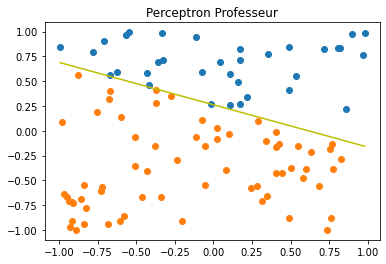

In [9]:
P=100
N=2
while True:
    X=np.random.uniform(-1,1,(P,N))
    Weight = np.random.uniform(-1,1,(N+1,1))
    ones = np.ones((P,1))
    X = np.append(ones,X,axis=1)
    tau = np.sign(X@Weight)
    if len(np.unique(tau)==1) :
        break
    
plot_decision(X[:,1:],tau,Weight,'Perceptron Professeur')

# Question 2) Apprentissage 

In [11]:
W_version_batch_eleve,IT_version_batch = perceptron_version_batch(P, N, X[:,1:], tau, alpha)
W_version_online_eleve,IT_version_online = perceptron_version_online(P, N, X[:,1:], tau, alpha)

# 2-a) Poids W du perceptron élève

In [12]:
print("Le poids W de convergence version batch est : ", "\n", W_version_batch_eleve )
print("Le poids W de convergence version online est : ","\n", W_version_online_eleve )

Le poids W de convergence version batch est :  
 [[ 25.61487998]
 [-38.25752281]
 [-97.83759332]]
Le poids W de convergence version online est :  
 [[  6.76868381]
 [-10.98968401]
 [-26.23776689]]


# 2-b) Le nombre d'itérations IT nécessaires pour converger

In [13]:
print("Le nombre d'itérations IT nécessaires pour converger, version batch est : ",IT_version_batch )
print("Le nombre d'itérations IT nécessaires pour converger, version online est : ",IT_version_online )

Le nombre d'itérations IT nécessaires pour converger, version batch est :  21
Le nombre d'itérations IT nécessaires pour converger, version online est :  15686


# 2-c) Le recouvrement R entre le perceptron professeur W* et l’élève W

In [14]:
def recouvrement(w_etoile,w):
    norm_w_etoile=np.linalg.norm(w_etoile)
    norm_w= np.linalg.norm(w)
    return np.cos((w_etoile.T@w)/(norm_w_etoile*norm_w))

In [15]:
recov_batch = recouvrement(Weight,W_version_batch_eleve)
recov_batch = (np.squeeze(recov_batch)).squeeze() 
recov_online = recouvrement(Weight,W_version_online_eleve)
recov_online = (np.squeeze(recov_online)).squeeze()
print("le recouvrement entre professeur et éléve version batch : ", recov_batch )
print("le recouvrement entre professeur et éléve version online : " ,recov_online)

le recouvrement entre professeur et éléve version batch :  0.5406847083138677
le recouvrement entre professeur et éléve version online :  0.5403257967591966


# 3) TESTS : Lancer le Programme avec differents  valeur sous forme de tableau

In [22]:
def batch_test(P, N, Nbr_tirage):
    Nbr_IT = 0
    Nbr_Recov = 0
    for i in range(Nbr_tirage):
        X=np.random.uniform(-1,1,(P,N))
        Weight = np.random.uniform(-1,1,(N+1,1))
        ones = np.ones((P,1))
        X = np.append(ones,X,axis=1)
        tau = np.sign(X@Weight)
        W_batch, IT_batch = perceptron_version_batch(P, N, X[:,1:], tau, alpha)
        Nbr_IT += IT_batch 
        Nbr_Recov += recouvrement(Weight, W_batch)
        
    Moy_IT = Nbr_IT/Nbr_tirage
    Moy_recov = Nbr_Recov/Nbr_tirage
    Moy_recov = (np.squeeze(Moy_recov)).squeeze()[()]
    return Moy_IT, Moy_recov

In [23]:
batch_test(10,2,50)

(5.26, 0.6415081160743774)

In [24]:
def online_test(P, N, Nbr_tirage):
    Nbr_IT = 0
    Nbr_Recov = 0
    for i in range(Nbr_tirage):
        X=np.random.uniform(-1,1,(P,N))
        Weight = np.random.uniform(-1,1,(N+1,1))
        ones = np.ones((P,1))
        X = np.append(ones,X,axis=1)
        tau = np.sign(X@Weight)
        W_batch, IT_batch = perceptron_version_online(P, N, X[:,1:], tau, alpha)
        Nbr_IT += IT_batch 
        Nbr_Recov += recouvrement(Weight, W_batch)
        
    Moy_IT = Nbr_IT/Nbr_tirage
    Moy_recov = Nbr_Recov/Nbr_tirage
    Moy_recov = (np.squeeze(Moy_recov)).squeeze()[()]
    return Moy_IT, Moy_recov

In [25]:
online_test(10,2,50)

(43.36, 0.6460273670830995)

In [36]:
import time

In [37]:
N = [2,10,100,500,1000,5000] 
P = [10,100,500,1000]
Nbr_tirage = 50
print('                   <IT>        <R>')
start_time = time.time()
for i in P :
    for j in N :
        Moy_IT,Moy_recov = batch_test(i,j,Nbr_tirage)
        print('P = ',i,'N = ', j,': ',Moy_IT, ' ; ', Moy_recov)
end_time = time.time()
print(f"Temps d'exécution version batch est : {end_time - start_time} secondes")

                   <IT>        <R>
P =  10 N =  2 :  6.16  ;  0.6313242642672345
P =  10 N =  10 :  3.86  ;  0.8060064498742541
P =  10 N =  100 :  3.22  ;  0.9727592063352776
P =  10 N =  500 :  3.08  ;  0.9946092638857364
P =  10 N =  1000 :  3.44  ;  0.9972810053145119
P =  10 N =  5000 :  3.3  ;  0.999437931479635
P =  100 N =  2 :  157.22  ;  0.5704396079175328
P =  100 N =  10 :  12.9  ;  0.5568021778031663
P =  100 N =  100 :  6.86  ;  0.7952769602245123
P =  100 N =  500 :  4.7  ;  0.9506611792699257
P =  100 N =  1000 :  4.94  ;  0.9734457509022657
P =  100 N =  5000 :  4.82  ;  0.9946541590625358
P =  500 N =  2 :  513.66  ;  0.5793177295754905
P =  500 N =  10 :  19.12  ;  0.5412580754534798
P =  500 N =  100 :  16.22  ;  0.5809966737866766
P =  500 N =  500 :  10.0  ;  0.7958268211385899
P =  500 N =  1000 :  7.34  ;  0.8842753443693531
P =  500 N =  5000 :  6.1  ;  0.9739650853400884
P =  1000 N =  2 :  312.5  ;  0.5639093237188383
P =  1000 N =  10 :  61.32  ;  0.54051405

In [35]:
N = [2,10,100,500,1000,5000] 
P = [10,100,500,1000]
Nbr_tirage = 50
print('                   <IT>        <R>')
start_time = time.time()
for i in P :
    for j in N :
        Moy_IT,Moy_recov = online_test(i,j,Nbr_tirage)
        print('P = ',i,'N = ', j,': ',Moy_IT, ' ; ', Moy_recov)
end_time = time.time()
print(f"Temps d'exécution version online est : {end_time - start_time} secondes")

                   <IT>        <R>
P =  10 N =  2 :  56.44  ;  0.6506844807759192
P =  10 N =  10 :  15.18  ;  0.8154166006523504
P =  10 N =  100 :  15.14  ;  0.9727137344153743
P =  10 N =  500 :  14.54  ;  0.9957446395469138
P =  10 N =  1000 :  13.86  ;  0.9978051423833242
P =  10 N =  5000 :  14.2  ;  0.9995702935723553
P =  100 N =  2 :  1675.24  ;  0.567442810259907
P =  100 N =  10 :  1989.18  ;  0.5566651327976812
P =  100 N =  100 :  467.7  ;  0.8054767857289324
P =  100 N =  500 :  317.82  ;  0.9549677715089198
P =  100 N =  1000 :  279.36  ;  0.9768574789922514
P =  100 N =  5000 :  308.88  ;  0.9955305573371149
P =  500 N =  2 :  20119.82  ;  0.5795637979367101
P =  500 N =  10 :  94916.62  ;  0.5411461424540761
P =  500 N =  100 :  15869.36  ;  0.5767906406218866
P =  500 N =  500 :  4390.16  ;  0.7953829316497331
P =  500 N =  1000 :  3196.06  ;  0.8888306061599032
P =  500 N =  5000 :  2383.62  ;  0.9773163976076863
P =  1000 N =  2 :  61339.38  ;  0.5749351656564948
P 